***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [112]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [113]:
dados = pd.read_csv('dados.csv')

### Visualize o conteúdo do DataFrame

In [114]:
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631
...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030
76836,53,0,30,4,7,1500,1.792934
76837,53,0,32,8,12,1300,1.830587
76838,53,0,57,8,4,1500,1.726344


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [115]:
salario_minimo = 788
classes_renda = [0, 2*salario_minimo, 5*salario_minimo, 15*salario_minimo, 25*salario_minimo, 200000]

### 2º Definir os labels das classes

In [116]:
labels_renda = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [117]:
frequencia_renda = pd.value_counts(pd.cut(
                                          x = dados.Renda,
                                          bins = classes_renda,
                                          labels = labels_renda,
                                          include_lowest = True))

frequencia_renda

E    49755
D    18602
C     7241
B      822
A      420
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [118]:
percentual_renda = pd.value_counts(pd.cut(
                                          x = dados.Renda,
                                          bins = classes_renda,
                                          labels = labels_renda,
                                          include_lowest = True),
                                   normalize = True) * 100

percentual_renda

E    64.751432
D    24.208745
C     9.423477
B     1.069755
A     0.546590
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [119]:
dist_freq_renda = pd.DataFrame({'Frequência': frequencia_renda, 'Porcentagem (%)': percentual_renda})
dist_freq_renda

,Frequência,Porcentagem (%)
E,49755,64.751432
D,18602,24.208745
C,7241,9.423477
B,822,1.069755
A,420,0.546590


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:xlabel='Classe', ylabel='Porcentagem'>

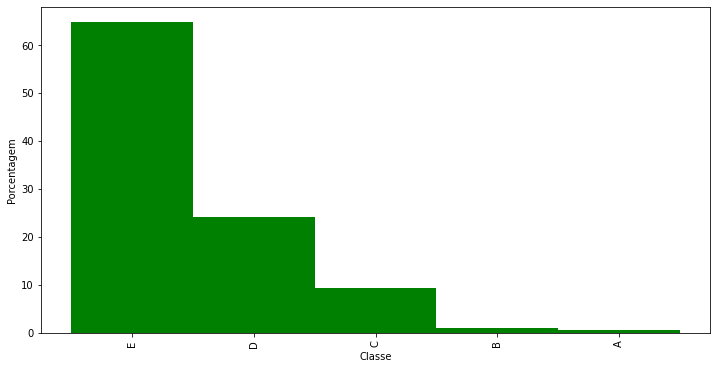

In [120]:
dist_freq_renda['Porcentagem (%)'].plot.bar(width=1, color='green', figsize=(12,6), xlabel="Classe", ylabel="Porcentagem")

> ### Conclusões

De acordo com a tabela de frequências e o gráfico acima, podemos observar que 64.75% das famílias entrevistadas tem uma renda de até 2 salários mínimos, e 24.2% das famílias tem uma renda de até 5 salários mínimos. Isso significa que 88,95% das famílias brasileiras tem uma renda mensal menor do que R$ 3940,00.

Por outro lado, é possível observar também que apenas 1.6\% das famílias tem uma renda superior a R$ 11820,00.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

<AxesSubplot:title={'center':'Distribuição de Frequências - Idade'}, xlabel='Idade', ylabel='Count'>

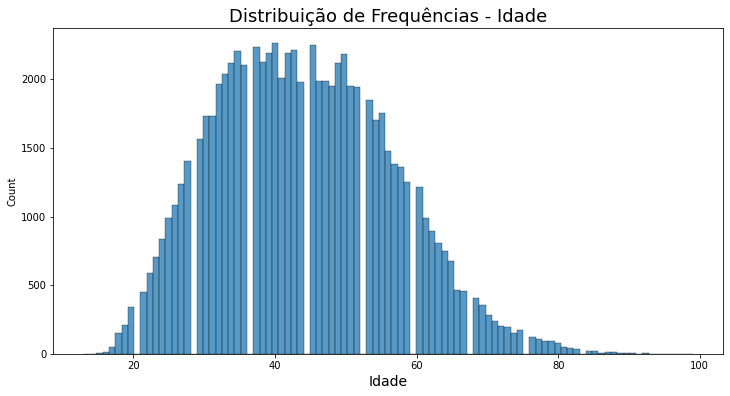

In [121]:
histograma_idade = sns.histplot(dados.Idade)
histograma_idade.figure.set_size_inches(12,6)
histograma_idade.set_title('Distribuição de Frequências - Idade', fontsize=18)
histograma_idade.set_xlabel('Idade', fontsize=14)
histograma_idade

<AxesSubplot:title={'center':'Distribuição de Frequências - Altura'}, xlabel='Altura', ylabel='Count'>

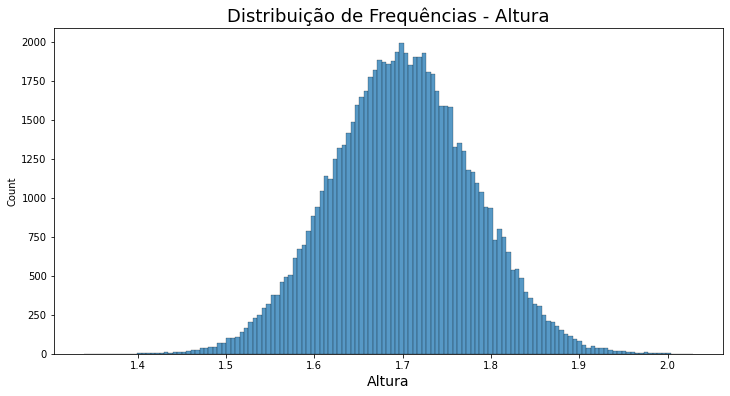

In [122]:
histograma_altura = sns.histplot(dados.Altura)
histograma_altura.figure.set_size_inches(12,6)
histograma_altura.set_title('Distribuição de Frequências - Altura', fontsize=18)
histograma_altura.set_xlabel('Altura', fontsize=14)
histograma_altura

<AxesSubplot:title={'center':'Distribuição de Frequências - Renda'}, xlabel='Renda (R$)', ylabel='Count'>

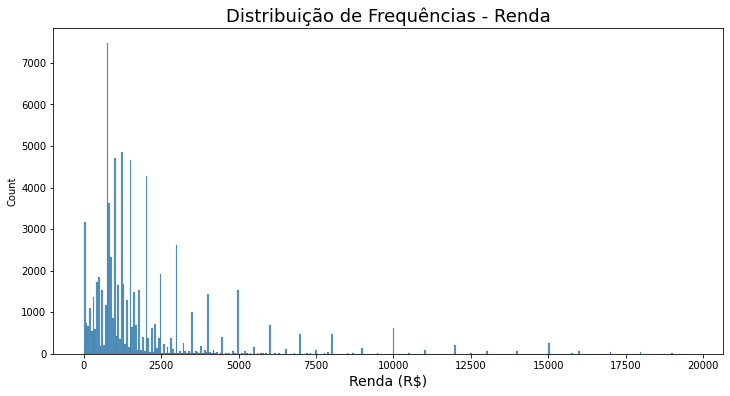

In [123]:
histograma_renda = sns.histplot(dados.query('Renda < 20000').Renda)
histograma_renda.figure.set_size_inches(12,6)
histograma_renda.set_title('Distribuição de Frequências - Renda', fontsize=18)
histograma_renda.set_xlabel('Renda (R$)', fontsize=14)
histograma_renda

> ### Conclusões

É possível observar que tanto a Idade quanto a Altura das pessoas entrevistadas seguem uma distribuição simétrica, enquanto que a Renda segue uma distribuição assimétrica à direita.

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [124]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [125]:
sexo_cor_anos_de_estudo = pd.crosstab(dados.Sexo,
                                      dados.Cor,
                                      aggfunc = 'mean',
                                      values = dados['Anos de Estudo'])

sexo_cor_anos_de_estudo.rename(index = sexo, inplace = True)
sexo_cor_anos_de_estudo.rename(columns = cor, inplace = True)

sexo_cor_anos_de_estudo

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,7.875000,10.140353,8.514540,12.587234,8.329929
Feminino,9.108911,11.297578,9.522326,12.495726,9.520714


In [126]:
sexo_cor_renda = pd.crosstab(dados.Sexo,
                             dados.Cor,
                             aggfunc = 'mean',
                             values = dados['Renda'])

sexo_cor_renda.rename(index = sexo, inplace = True)
sexo_cor_renda.rename(columns = cor, inplace = True)

sexo_cor_renda

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


> ### Conclusões

Podemos observar que a quantidade de anos de estudo de uma pessoa está diretamente relacionada com a renda média. Homems da cor amarela possuem a maior média de anos de estudo e consequentemente de renda, enquanto que homens indígenas possuem a menor média de anos de estudo e também a menor média de renda.

É possível observar também que, independente da cor, mulheres ganham significativamente menos que os homens da mesma cor.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [127]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [128]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [129]:
dados.Renda.mode()[0]

788

### Obtenha o desvio médio absoluto

In [130]:
dados.Renda.mad()

1526.4951371638058

### Obtenha a variância

In [131]:
dados.Renda.var()

11044906.006217021

### Obtenha o desvio-padrão

In [132]:
dados.Renda.std()

3323.3877303464037

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [133]:
sexo_cor_renda = pd.crosstab(dados.Sexo,
                             dados.Cor,
                             aggfunc = 'mean',
                             values = dados['Renda'])

sexo_cor_renda.rename(index = sexo, inplace = True)
sexo_cor_renda.rename(columns = cor, inplace = True)

sexo_cor_renda


Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,1081.710938,2925.744435,1603.861687,4758.251064,1659.577425
Feminino,2464.386139,2109.866750,1134.596400,3027.341880,1176.758516


In [134]:
sexo_cor_renda2 = pd.crosstab(dados.Sexo,
                             dados.Cor,
                             aggfunc = 'median',
                             values = dados['Renda'])

sexo_cor_renda2.rename(index = sexo, inplace = True)
sexo_cor_renda2.rename(columns = cor, inplace = True)

sexo_cor_renda2

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,797.5,1700.0,1200.0,2800.0,1200.0
Feminino,788.0,1200.0,800.0,1500.0,800.0


In [135]:
sexo_cor_renda3 = pd.crosstab(dados.Sexo,
                             dados.Cor,
                             aggfunc = 'max',
                             values = dados['Renda'])

sexo_cor_renda3.rename(index = sexo, inplace = True)
sexo_cor_renda3.rename(columns = cor, inplace = True)

sexo_cor_renda3

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


> ### Conclusões

A média aritmética da renda, independente da cor da pessoa, é sempre menor do que a mediana (valor mais comum), o que indica que existem outliers ganhando muito mais do que a grande maioria das pessoas.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [136]:
sexo_cor_renda = pd.crosstab(dados.Sexo,
                             dados.Cor,
                             aggfunc = {'mad', 'var', 'std'},
                             values = dados['Renda'])

sexo_cor_renda.rename(index = sexo, inplace = True)
sexo_cor_renda.rename(columns = cor, inplace = True)

sexo_cor_renda

mad                                                     \
Cor           Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                        
Masculino   798.910889  2261.012346  975.602482  3709.597211  1125.827704   
Feminino   3007.892952  1670.967106  705.453357  2549.146322   811.580946   

                    std                                                     \
Cor            Indígena       Branca        Preta     Amarela        Parda   
Sexo                                                                         
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184   
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                         
Cor               Parda  
Sexo                     
Masculino  5.345747e+06  
Feminino   2.547960e+06

> ### Conclusões

Podemos observar que o desvio padrão, independente da cor, é muito mais alto do que deveria ser. Isso indica uma grande desigualdade na distribuição de renda.

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='Sexo'>

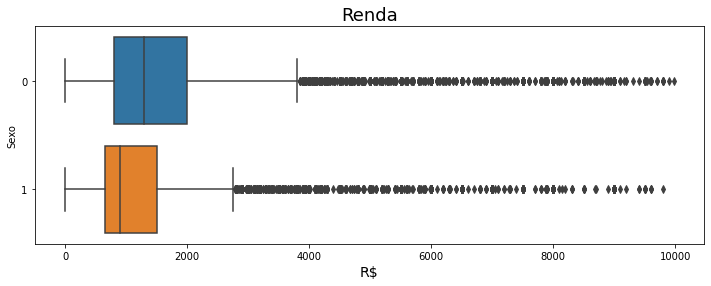

In [137]:
ax = sns.boxplot(x = 'Renda', y = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

<AxesSubplot:title={'center':'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

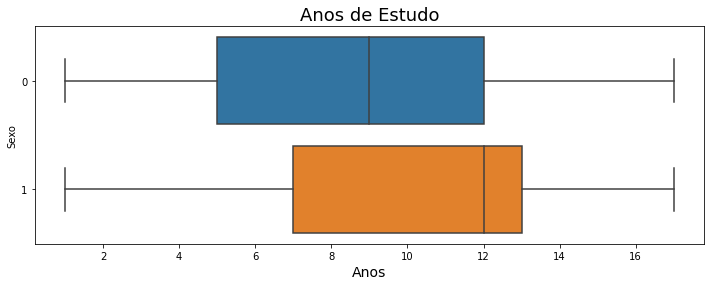

In [138]:
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', data = dados, orient = 'h')

ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

> ### Conclusões

Apesar de terem, em média, mais anos de estudo, as mulheres ganham, em média, menos do que os homens.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [139]:
from scipy import stats

stats.percentileofscore(dados.Renda, 788)


24.390942217595004

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [140]:
np.percentile(dados.Renda, 99)

15000.0

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [141]:
sexo_renda_estudo = pd.crosstab(dados.Sexo,
                             dados['Anos de Estudo'],
                             aggfunc = {'mean', 'median', 'max', 'std'},
                             values = dados['Renda'])

sexo_renda_estudo.rename(index = sexo, inplace = True)
sexo_renda_estudo.rename(columns = anos_de_estudo, inplace = True)

sexo_renda_estudo

max                             \
Anos de Estudo Sem instrução e menos de 1 ano    1 ano   2 anos   3 anos   
Sexo                                                                       
Masculino                             30000.0  30000.0  40000.0  80000.0   
Feminino                              10000.0   2000.0   4000.0   3500.0   

                                                                      ...  \
Anos de Estudo   4 anos   5 anos   6 anos   7 anos   8 anos   9 anos  ...   
Sexo                                                                  ...   
Masculino       50000.0  35000.0  25000.0  40000.0  30000.0  60000.0  ...   
Feminino        10000.0   8000.0   6000.0   9000.0  18000.0  20000.0  ...   

                        std                                         \
Anos de Estudo       7 anos       8 anos       9 anos      10 anos   
Sexo                                                                 
Masculino       1419.708673  1515.583715  2137.664774  2078.609734   
Feminino         602.038029   896.781213   973.221652   620.611907   

                                                                    \
Anos de Estudo      11 anos      12 anos      13 anos      14 anos   
Sexo                                                                 
Masculino       2676.538942  2268.081538  2797.116800  3987.214974   
Feminino        1819.040417  4851.833513  2053.789771  2064.083336   

                                                 
Anos de Estudo 15 anos ou mais Não determinados  
Sexo                                             
Masculino          7447.613594       979.648745  
Feminino           4212.770709       459.985964  

[2 rows x 68 columns]

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Anos de Estudo'}, xlabel='Anos', ylabel='Sexo'>

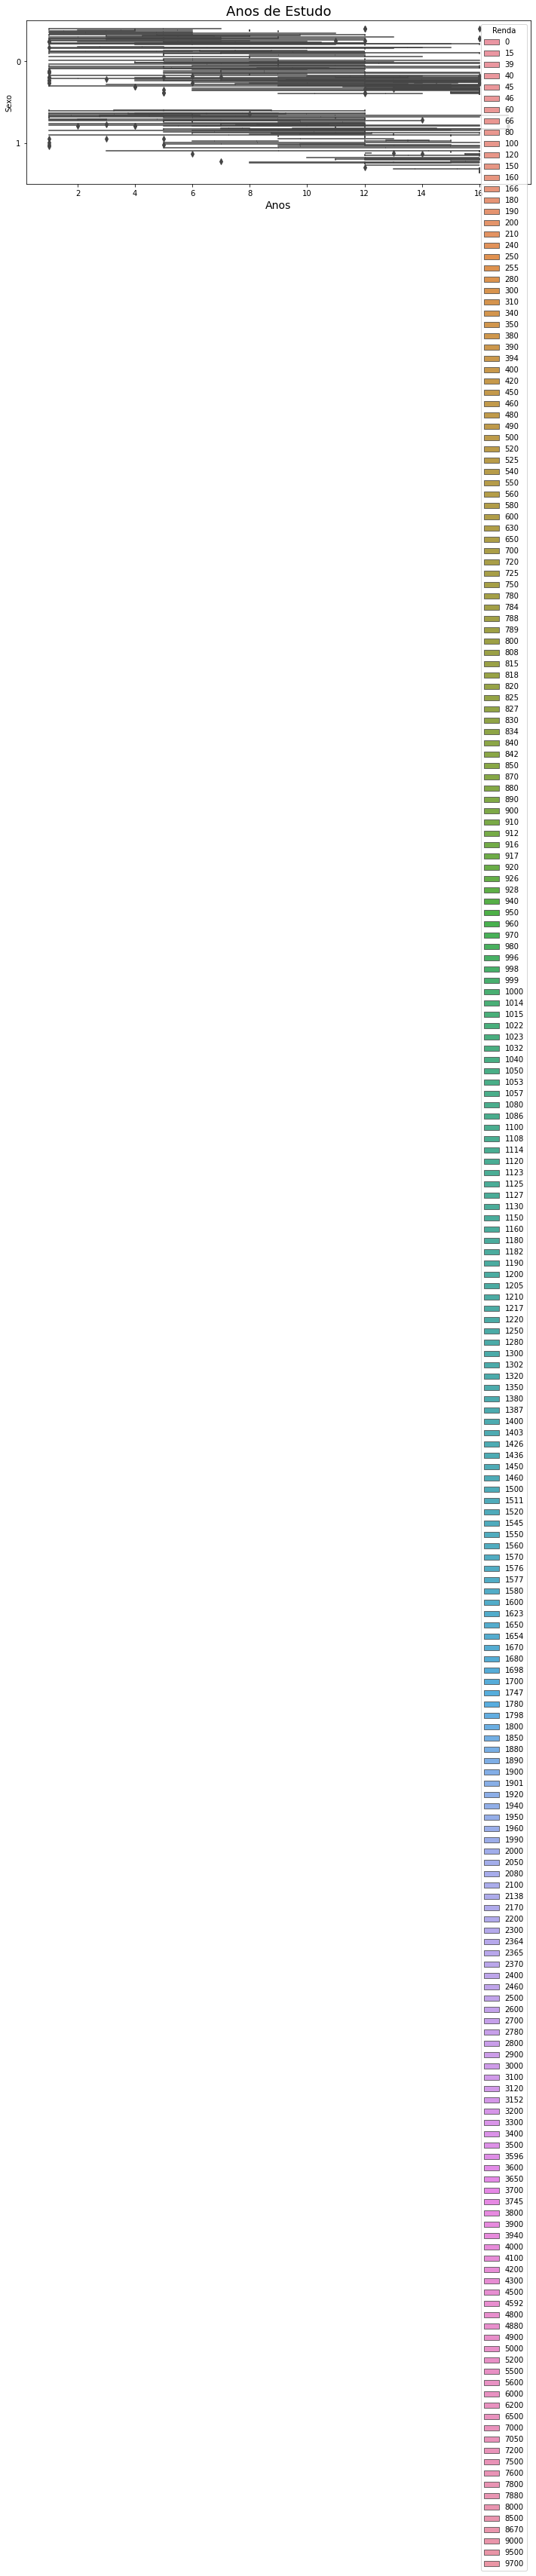

In [143]:
ax = sns.boxplot(x = 'Anos de Estudo', y = 'Sexo', hue='Renda', data = dados.query('Renda < 10000 and Idade == 40'), orient = 'h')

ax.figure.set_size_inches(12, 4)
ax.set_title('Anos de Estudo', fontsize=18)
ax.set_xlabel('Anos', fontsize=14)
ax

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

> ### Conclusões

Escreva suas conclusões aqui...